# HSE 2025: Mathematical Methods for Data Analysis

## Homework 1

# Attention!

* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

If the task asks for an explanation of something, it means that a written answer is required, which is part of the task and is assessed

We only accept ipynb notebooks. If you use Google Colab, you need to download the notebook before submitting your homework

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys
from scipy.spatial import distance
import warnings
warnings.filterwarnings("ignore")
import re
%matplotlib inline
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator

sns.set(style="darkgrid")

# 1. Python (1 points)

###**Task 1** (0.25 points)<br/>
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [ ]:
def find_product(a, r, N):
    arr_product = []
    current = a
    for i in range(N):
        arr_product.append(current)
        current *= r
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a, r, N))

[2, 6, 18]


###**Task 2** (0.25 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back.

In [ ]:
def check_palindrome(N):
    num_str = str(N)
    return num_str == num_str[::-1]

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


###**Task 3** (0.25 points) <br/>
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [ ]:
def find_palindromes(N):
    palindromes = []
    num = 1000
    while len(palindromes) < N:
        if check_palindrome(num):
            palindromes.append(num)
        num += 1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


###**Task 4** (0.25 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [ ]:
from random import randint

def find_min(a, b, c):
    min_ = a
    if b < min_:
        min_ = b
    if c < min_:
        min_ = c
    return min_

for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-27 -9 -57 	Minimum: -57
-46 52 -25 	Minimum: -46
-12 -45 -1 	Minimum: -45
-91 98 -11 	Minimum: -91
-23 -99 -19 	Minimum: -99
-78 48 -4 	Minimum: -78
4 23 -10 	Minimum: -10
51 -78 1 	Minimum: -78
-50 94 81 	Minimum: -50
-83 52 30 	Minimum: -83


# 2. Numpy (2 points)

###**Task 1** (0.25 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [ ]:
my_array = np.random.rand(17)
my_array = 6 * my_array / np.sum(my_array)

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


### **Task 2** (0.25 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [ ]:
def calculate_manhattan(a, b):
    return np.sum(np.abs(a - b))

def calculate_euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

def calculate_chebyshev(a, b):
    return np.max(np.abs(a - b))

def calculate_cosine(a, b):
    dot_product = np.sum(a.T * b)
    norm_a = np.sqrt(np.sum(a**2))
    norm_b = np.sqrt(np.sum(b**2))
    cosine_dist = distance.cosine(a, b)
    return 1 - dot_product / (norm_a * norm_b)

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
a = np.random.rand(5)
b = np.random.rand(5)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 0.8145673061841908
Euclidean distance: 0.4916019017179556
Chebyshev distance: 0.42340185824289966
Cosine distance: 0.04751737597096384


###**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

This is data normalization. Read [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), how to do this

In [ ]:
def transform(array):
    scaler = MinMaxScaler(feature_range=(-4, -1))
    array_2d = array.reshape(-1, 1)
    transformed_2d = scaler.fit_transform(array_2d)
    transformed_array = transformed_2d.flatten()
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return transformed_array

In [ ]:
my_array = np.random.randint(-100, 100, 76)

my_array = transform(my_array)
print(f'Transformed array:')
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Transformed array:
Min: -4.0
Max: -0.9999999999999998
Array:
[-3.54314721 -2.0964467  -1.50253807 -3.87817259 -1.95939086 -2.58375635
 -1.09137056 -2.88832487 -2.94923858 -1.98984772 -3.28426396 -1.03045685
 -3.83248731 -1.         -1.15228426 -1.74619289 -2.72081218 -2.30964467
 -3.90862944 -1.41116751 -2.56852792 -3.90862944 -2.76649746 -2.49238579
 -2.24873096 -2.15736041 -2.81218274 -3.68020305 -2.41624365 -3.16243655
 -2.23350254 -1.36548223 -3.26903553 -2.99492386 -3.66497462 -4.
 -3.60406091 -1.18274112 -2.6751269  -2.76649746 -1.62436548 -1.
 -2.49238579 -1.12182741 -3.90862944 -3.25380711 -3.80203046 -2.43147208
 -3.90862944 -3.66497462 -1.50253807 -2.24873096 -1.8071066  -1.76142132
 -1.88324873 -1.2284264  -2.6142132  -1.95939086 -3.51269036 -1.73096447
 -3.89340102 -1.39593909 -2.00507614 -2.29441624 -3.22335025 -1.31979695
 -2.49238579 -3.04060914 -1.12182741 -1.35025381 -3.52791878 -2.05076142
 -1.         -2.29441624 -1.50253807 -3.36040609]


###**Task 4** (0.25 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
my_array = np.random.randint(-7, 44, (8, 5))
selected_column = np.argmax(np.max(my_array, axis=0))
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[42 22 41 38 12]
 [-1 21 18 33 14]
 [38  7 30 25 10]
 [40 43 13 35 38]
 [30 25 19 -3 37]
 [-4 33 23 15 -4]
 [ 4  0 -1 35 -1]
 [-3 12 23 19 34]]
Selected column: 1


###**Task 5** (0.25 points) <br/>

Replace all missing values in the following array with median.

In [ ]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.83022698        nan 0.71206748        nan 0.85679601        nan
 0.34980084 0.55879693 0.55553497 0.50658573]


In [ ]:
def replace_missing(arr):
    median = np.nanmedian(arr)
    array_without_missing = np.where(np.isnan(arr), median, arr)
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return array_without_missing

In [ ]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.83022698 0.55879693 0.71206748 0.55879693 0.85679601 0.55879693
 0.34980084 0.55879693 0.55553497 0.50658573]


###**Task 6** (0.25 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [ ]:
def mean_channel(X):
    mean_vector = np.mean(X, axis=(0, 1))
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return mean_vector

In [ ]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-1.75514874 -1.88329519 -1.97482838]


### **Task 7** (0.25 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique first axis layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [ ]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis=1)
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return X_unique

In [ ]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[4 5 4]
  [5 5 5]
  [5 4 5]]

 [[4 4 4]
  [4 5 5]
  [5 4 4]]

 [[4 4 4]
  [5 4 5]
  [5 4 5]]

 [[4 4 5]
  [4 5 4]
  [5 4 5]]

 [[4 5 4]
  [4 5 5]
  [5 4 5]]

 [[5 4 4]
  [4 5 5]
  [4 4 4]]

 [[5 5 4]
  [5 4 4]
  [4 5 4]]

 [[4 5 4]
  [4 4 4]
  [4 4 5]]

 [[5 4 5]
  [4 4 4]
  [4 4 5]]

 [[4 4 4]
  [4 4 5]
  [5 4 4]]

 [[4 5 5]
  [4 5 5]
  [5 5 4]]

 [[4 4 5]
  [4 5 4]
  [4 5 5]]

 [[5 4 5]
  [5 5 5]
  [4 5 4]]

 [[5 4 5]
  [4 5 5]
  [4 5 5]]

 [[5 5 5]
  [5 4 4]
  [4 5 5]]

 [[4 5 4]
  [5 5 5]
  [4 5 4]]

 [[4 4 4]
  [5 5 5]
  [5 5 5]]

 [[5 4 5]
  [5 4 4]
  [4 4 5]]

 [[4 4 5]
  [5 5 4]
  [5 5 5]]]
Unique columns:


array([[[4, 5, 4],
        [5, 4, 5],
        [5, 5, 5]],

       [[4, 4, 4],
        [5, 4, 4],
        [4, 5, 5]],

       [[4, 4, 4],
        [5, 4, 5],
        [5, 4, 5]],

       [[4, 4, 5],
        [5, 4, 5],
        [4, 5, 4]],

       [[4, 5, 4],
        [5, 4, 5],
        [4, 5, 5]],

       [[5, 4, 4],
        [4, 4, 4],
        [4, 5, 5]],

       [[5, 5, 4],
        [4, 5, 4],
        [5, 4, 4]],

       [[4, 5, 4],
        [4, 4, 5],
        [4, 4, 4]],

       [[5, 4, 5],
        [4, 4, 5],
        [4, 4, 4]],

       [[4, 4, 4],
        [5, 4, 4],
        [4, 4, 5]],

       [[4, 5, 5],
        [5, 5, 4],
        [4, 5, 5]],

       [[4, 4, 5],
        [4, 5, 5],
        [4, 5, 4]],

       [[5, 4, 5],
        [4, 5, 4],
        [5, 5, 5]],

       [[5, 4, 5],
        [4, 5, 5],
        [4, 5, 5]],

       [[5, 5, 5],
        [4, 5, 5],
        [5, 4, 4]],

       [[4, 5, 4],
        [4, 5, 4],
        [5, 5, 5]],

       [[4, 4, 4],
        [5, 5, 5],
        [5, 5, 5]]

# 3. Pandas & Visualization (2 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Task 1** (0.5 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [ ]:
# Are there any missing values? In what columns?
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
missing_info[missing_info['Missing Count'] > 0]

,Missing Count,Missing Percentage
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


Survival rate: 38.38%


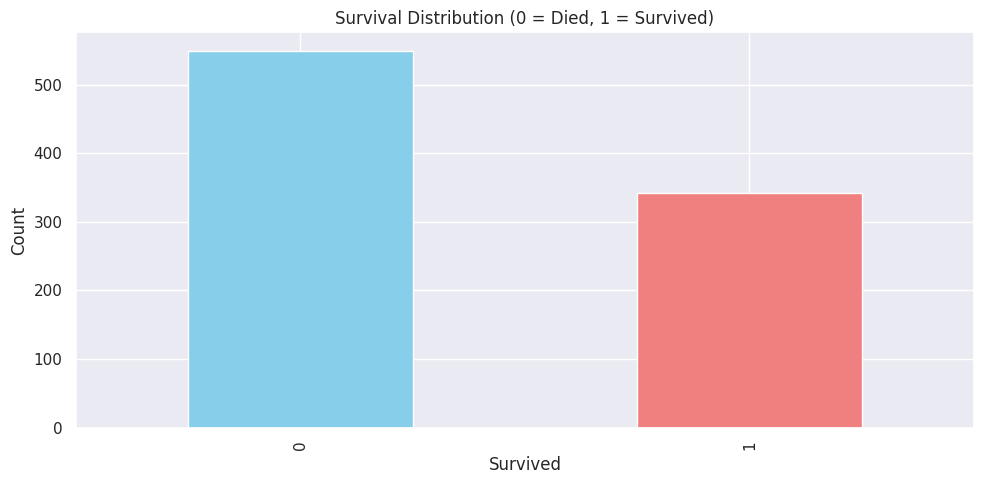

In [ ]:
# What is the percentage of survived passengers? Are the classes balanced?
survival_rate = df['Survived'].mean() * 100
print(f"Survival rate: {survival_rate:.2f}%")

plt.figure(figsize=(10, 5))

df['Survived'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Survival Distribution (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
class_balance = df['Survived'].value_counts()
print("Classes balanсe:")
print(f"Died: {class_balance[0]} ({class_balance[0]/len(df)*100:.2f}%)")
print(f"Survived: {class_balance[1]} ({class_balance[1]/len(df)*100:.2f}%)")

if abs(class_balance[0] - class_balance[1]) / len(df) < 0.2:
    print("Classes are balanced")
else:
    print("Classes are not balanced")

Classes balanсe:
Died: 549 (61.62%)
Survived: 342 (38.38%)
Classes are not balanced


Male: 577 (64.76%)
Female: 314 (35.24%)


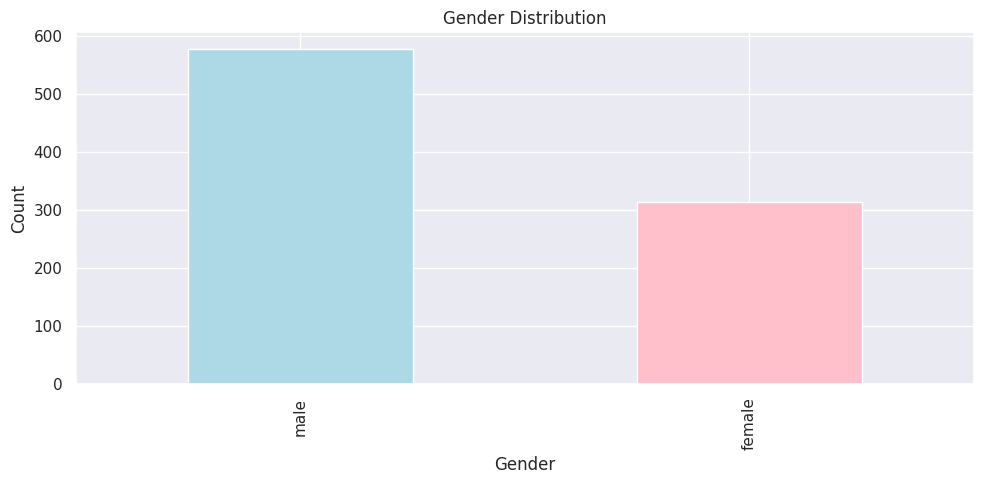

In [ ]:
# Were there more males or females?
gender_counts = df['Sex'].value_counts()
gender_percent = df['Sex'].value_counts(normalize=True) * 100

print(f"Male: {gender_counts.get('male', 0)} ({gender_percent.get('male', 0):.2f}%)")
print(f"Female: {gender_counts.get('female', 0)} ({gender_percent.get('female', 0):.2f}%)")

plt.figure(figsize=(10, 5))
gender_counts.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

Embarkation ports:
S: 644 (72.44%)
C: 168 (18.90%)
Q: 77 (8.66%)
Least popular port: Q


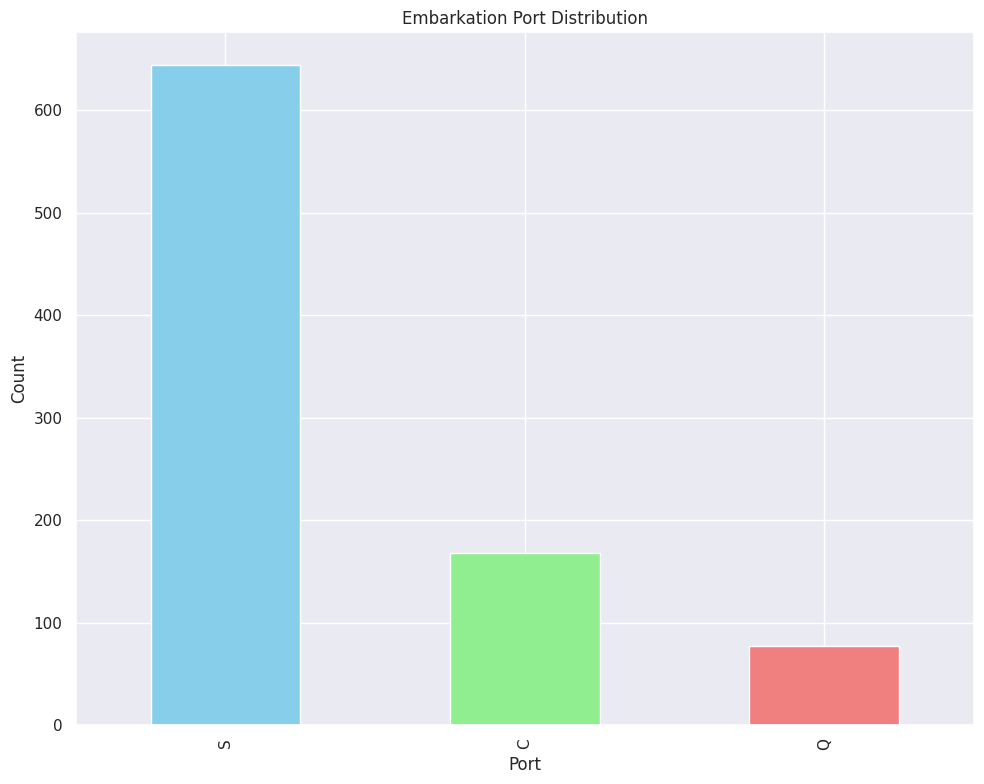

In [ ]:
# What was the least popular port of embarkation?
embarkation_counts = df['Embarked'].value_counts()
embarkation_percent = df['Embarked'].value_counts(normalize=True) * 100

print("Embarkation ports:")
for port, count in embarkation_counts.items():
    print(f"{port}: {count} ({embarkation_percent[port]:.2f}%)")

least_popular = embarkation_counts.idxmin()
print(f"Least popular port: {least_popular}")

plt.figure(figsize=(10, 8))
embarkation_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Embarkation Port Distribution')
plt.xlabel('Port')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# How many classes (pclass) were there on Titanic?
classes = sorted(df['Pclass'].unique())
print(f"Number of classes: {len(classes)}")

class_counts = df['Pclass'].value_counts().sort_index()
print("Passengers per each class:")
for pclass, count in class_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Class {pclass}: {count} passengers ({percentage:.2f}%)")

Number of classes: 3
Passengers per each class:
Class 1: 216 passengers (24.24%)
Class 2: 184 passengers (20.65%)
Class 3: 491 passengers (55.11%)


In [ ]:
# What is the overall average ticket fare? And for every class?
overall_avg_fare = df['Fare'].mean()
print(f"Overall average fare: ${overall_avg_fare:.2f}")

avg_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print("Average fare by class:")
for pclass, avg_fare in avg_fare_by_class.items():
    print(f"Class {pclass}: ${avg_fare:.2f}")

Overall average fare: $32.20
Average fare by class:
Class 1: $84.15
Class 2: $20.66
Class 3: $13.68


### **Task 2** (0.25 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

<Figure size 1200x800 with 0 Axes>

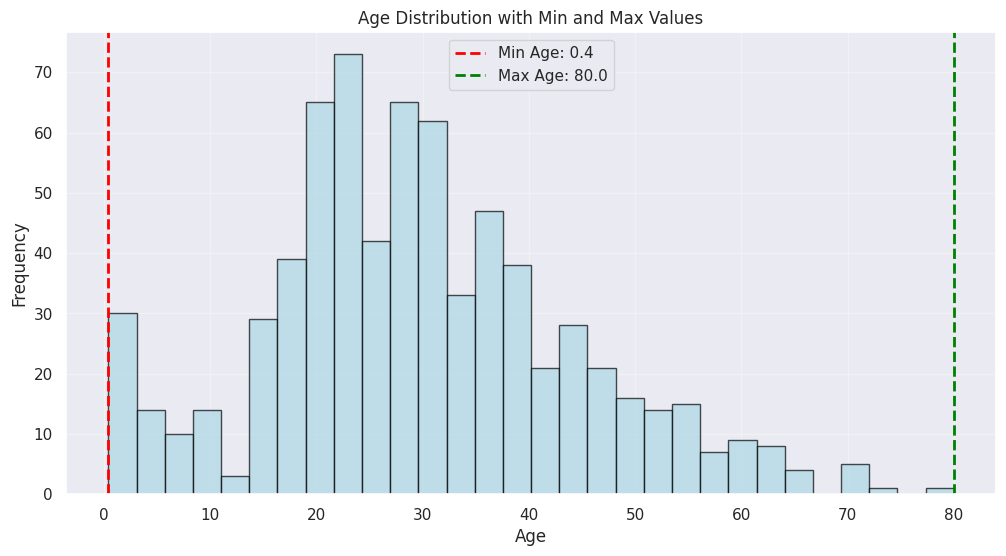

Minimal age: 0.42 years
Maximum age: 80.00 years


In [ ]:
# What is the minimal and maximum ages of the passengers? Visualize it on the plot
plt.figure(figsize=(12, 8))

min_age = df['Age'].min()
max_age = df['Age'].max()

plt.figure(figsize=(12, 6))
plt.hist(df['Age'].dropna(), bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(min_age, color='red', linestyle='--', linewidth=2, label=f'Min Age: {min_age:.1f}')
plt.axvline(max_age, color='green', linestyle='--', linewidth=2, label=f'Max Age: {max_age:.1f}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution with Min and Max Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Minimal age: {min_age:.2f} years")
print(f"Maximum age: {max_age:.2f} years")

Overall mean age: 29.70 years
Mean age (male): 30.73 years
Mean age (female): 27.92 years


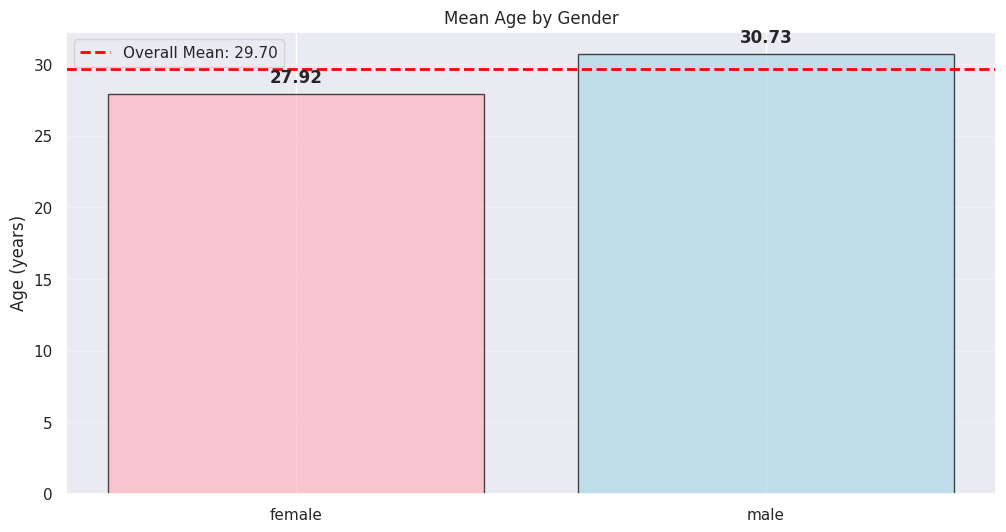

In [ ]:
# What is the mean age? And among males and females sepatately? Visualize it on the plot
mean_age = df['Age'].mean()
mean_age_male = df[df['Sex'] == 'male']['Age'].mean()
mean_age_female = df[df['Sex'] == 'female']['Age'].mean()

print(f"Overall mean age: {mean_age:.2f} years")
print(f"Mean age (male): {mean_age_male:.2f} years")
print(f"Mean age (female): {mean_age_female:.2f} years")
plt.figure(figsize=(12, 6))
ages_by_gender = df.groupby('Sex')['Age'].mean()

plt.bar(ages_by_gender.index, ages_by_gender.values,
        color=['lightpink', 'lightblue'], alpha=0.7, edgecolor='black')
plt.axhline(y=mean_age, color='red', linestyle='--', linewidth=2,
            label=f'Overall Mean: {mean_age:.2f}')

for i, value in enumerate(ages_by_gender.values):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.ylabel('Age (years)')
plt.title('Mean Age by Gender')
plt.legend()
plt.grid(alpha=0.3, axis='y')
plt.show()

1. На гистограмме мы видим распределение пассажиров по возрасту - от младенцев до 80-летних. Маленьких детей больше, чем детей постарше. В целом, график показывает правостороннюю асимметрию, при этом большинство пассажиров находились в возрасте от 20 до 30 лет, но есть и пики среди людей среднего возраста. Это показывает, что на борту были как молодые пары, так и семьи с детьми и другими членами семьи.

2. На гистограмме показаны средние значения: общий средний возраст составляет 29,70 лет, при этом мужчины в среднем старше (30,73 года), а женщины моложе (27,92 года). Разница между средним возрастом мужчин и женщин составляет 2,81 года.

###**Task 3** (0.5 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def extract_title(name):
    match = re.search(r' ([A-Za-z]+)\.', name)
    return match.group(1)

df['Title'] = df['Name'].apply(extract_title)
df['Title'].head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [ ]:
unique_titles = df['Title'].nunique()
print(f"Number of unique titles: {unique_titles}")
print("Unique titles:", sorted(df['Title'].unique()))

Number of unique titles: 17
Unique titles: ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir']


In [ ]:
title_counts = df['Title'].value_counts()
print(f"Passengers by title:")
for title, count in title_counts.items():
    print(f"   {title}: {count} passengers")

Passengers by title:
   Mr: 517 passengers
   Miss: 182 passengers
   Mrs: 125 passengers
   Master: 40 passengers
   Dr: 7 passengers
   Rev: 6 passengers
   Col: 2 passengers
   Mlle: 2 passengers
   Major: 2 passengers
   Ms: 1 passengers
   Mme: 1 passengers
   Don: 1 passengers
   Lady: 1 passengers
   Sir: 1 passengers
   Capt: 1 passengers
   Countess: 1 passengers
   Jonkheer: 1 passengers


In [ ]:
title_sex_counts = df.groupby(['Title', 'Sex']).size().reset_index(name='Count')
male_titles = title_sex_counts[title_sex_counts['Sex'] == 'male']
most_popular_male = male_titles.loc[male_titles['Count'].idxmax()]
female_titles = title_sex_counts[title_sex_counts['Sex'] == 'female']
most_popular_female = female_titles.loc[female_titles['Count'].idxmax()]

print(f"Most popular titles by gender:")
print(f"Men:'{most_popular_male['Title']}' - {most_popular_male['Count']} passengers")
print(f"Women:'{most_popular_female['Title']}' - {most_popular_female['Count']} passengers")


Most popular titles by gender:
Men:'Mr' - 517 passengers
Women:'Miss' - 182 passengers


###**Task 4** (0.25 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



In [ ]:
correlation = df['Pclass'].corr(df['Fare'])
print(f"Correlation between Pclass and Fare: {correlation:.2f}")
mean_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print(f"Mean fare by passenger class:")
for pclass, mean_fare in mean_fare_by_class.items():
    print(f"Class {pclass}: ${mean_fare:.2f}")

Correlation between Pclass and Fare: -0.55
Mean fare by passenger class:
Class 1: $84.15
Class 2: $20.66
Class 3: $13.68


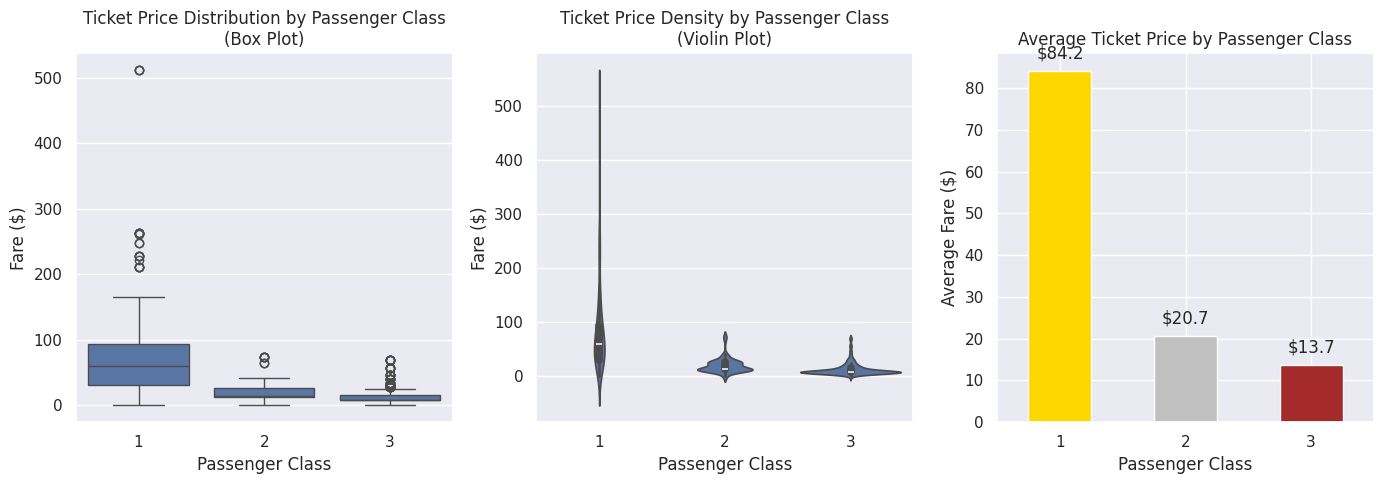

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Ticket Price Distribution by Passenger Class\n(Box Plot)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare ($)')

plt.subplot(1, 3, 2)
sns.violinplot(x='Pclass', y='Fare', data=df)
plt.title('Ticket Price Density by Passenger Class\n(Violin Plot)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare ($)')

plt.subplot(1, 3, 3)
mean_fare_by_class.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Average Ticket Price by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=0)
for i, value in enumerate(mean_fare_by_class):
    plt.text(i, value + 2, f'${value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Боксплот по классам:** четко видно разделение пассажиров в зависимости от цен на билеты. Первый класс имеет самый широкий диапазон цен, с многочисленными выбросами в верхней части, указывающими на возможномть дополнительных опций и услуг, которые повышали цену. Второй и третий классы имеют значительно более низкие и концентрированные ценовые диапазоны.

**График плотности:** Первый класс демонстрирует широкое распределение цен с выраженной мультимодальностью, что указывает на различные категории внутри класса. Второй и третий классы имеют узкие пики, что подтверждает их однородность с точки зрения цены.

**Гистограмма средних цен:** Существует значительный разрыв в стоимости между первым классом (84,2 доллара) и другими категориями. Цены второго класса примерно в четыре раза ниже, а третьего - в шесть раз, что отражает строгую иерархию обслуживания.

###**Task 5** (0.25 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [ ]:
df['Embarked_numeric'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}) # for correlation
correlation = df['Embarked_numeric'].corr(df['Fare'])
print(f"Correlation between Embarked and Fare: {correlation:.2f}")

mean_fare_by_port = df.groupby('Embarked')['Fare'].mean()
for port, mean_fare in mean_fare_by_port.items():
    print(f"Port {port}: ${mean_fare:.2f}")

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Correlation between Embarked and Fare: -0.23
Port C: $59.95
Port Q: $13.28
Port S: $27.08


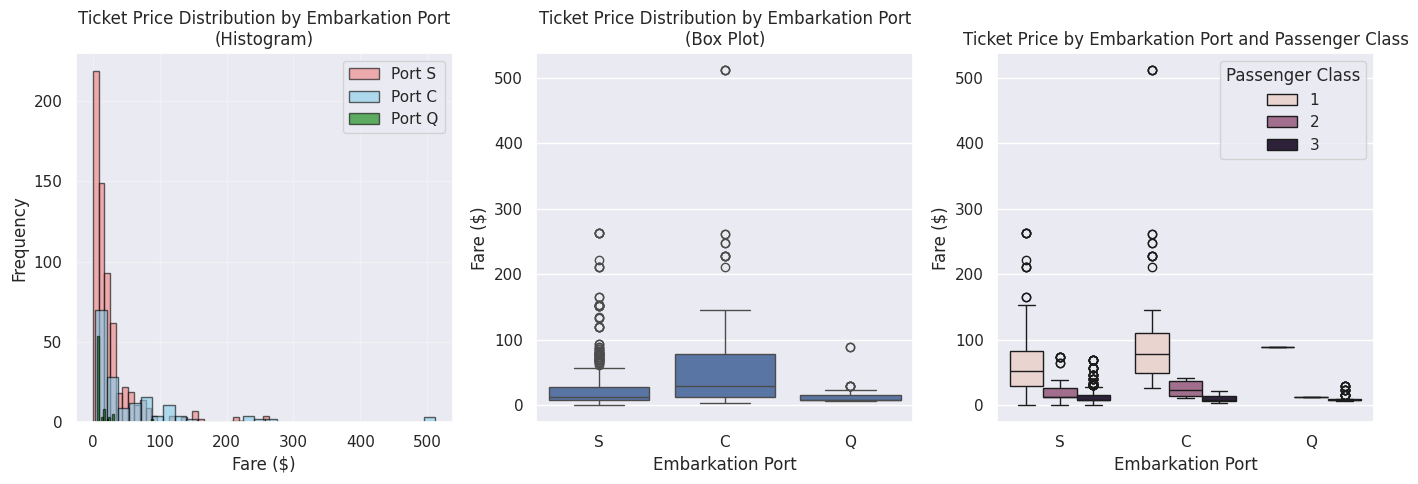

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
colors = {'C': 'skyblue', 'Q': 'green', 'S': 'lightcoral'}
for port in df['Embarked'].dropna().unique():
    port_fares = df[df['Embarked'] == port]['Fare'].dropna()
    plt.hist(port_fares, bins=30, alpha=0.6, label=f'Port {port}',
             color=colors.get(port, 'gray'), edgecolor='black')
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')
plt.title('Ticket Price Distribution by Embarkation Port\n(Histogram)')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
sns.boxplot(x='Embarked', y='Fare', data=df)
plt.title('Ticket Price Distribution by Embarkation Port\n(Box Plot)')
plt.xlabel('Embarkation Port')
plt.ylabel('Fare ($)')

plt.subplot(1, 3, 3)
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=df)
plt.title('Ticket Price by Embarkation Port and Passenger Class')
plt.xlabel('Embarkation Port')
plt.ylabel('Fare ($)')
plt.legend(title='Passenger Class', loc='upper right')

plt.tight_layout()
plt.show()

**Гистограмма портов:**
Порт C обслуживал пассажиров с самым разным финансовым положением, в то время как порты Q и S привлекали преимущественно пассажиров с ограниченными бюджетами. Распределение цен в порту C более равномерно, в то время как в портах Q и S явно преобладают более низкие ценовые категории.

 **График портов:**
Порт С лидирует по средней цене билета, что подтверждает его статус порта для более состоятельных пассажиров. Порты Q и S демонстрируют схожее распределение с низкими средними значениями и ограниченной вариацией цен.

**Сводный график:**
Существует определенная закономерность: первый класс в каждом порту значительно дороже, чем другие классы. Однако в порту C больше пассажиров из первого класса, в то время как порты Q и S обслуживают в основном пассажиров второго и третьего классов.

###**Task 6** (0.25 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

In [ ]:
mean_age_survived = df.groupby('Survived')['Age'].mean()
print("Mean age by survival status:")
print(f"Survived (1): {mean_age_survived[1]:.1f} years")
print(f"Not Survived (0): {mean_age_survived[0]:.1f} years")
print(f"Difference: {abs(mean_age_survived[1] - mean_age_survived[0]):.1f} years")
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Mean age by survival status:
Survived (1): 28.3 years
Not Survived (0): 30.6 years
Difference: 2.3 years


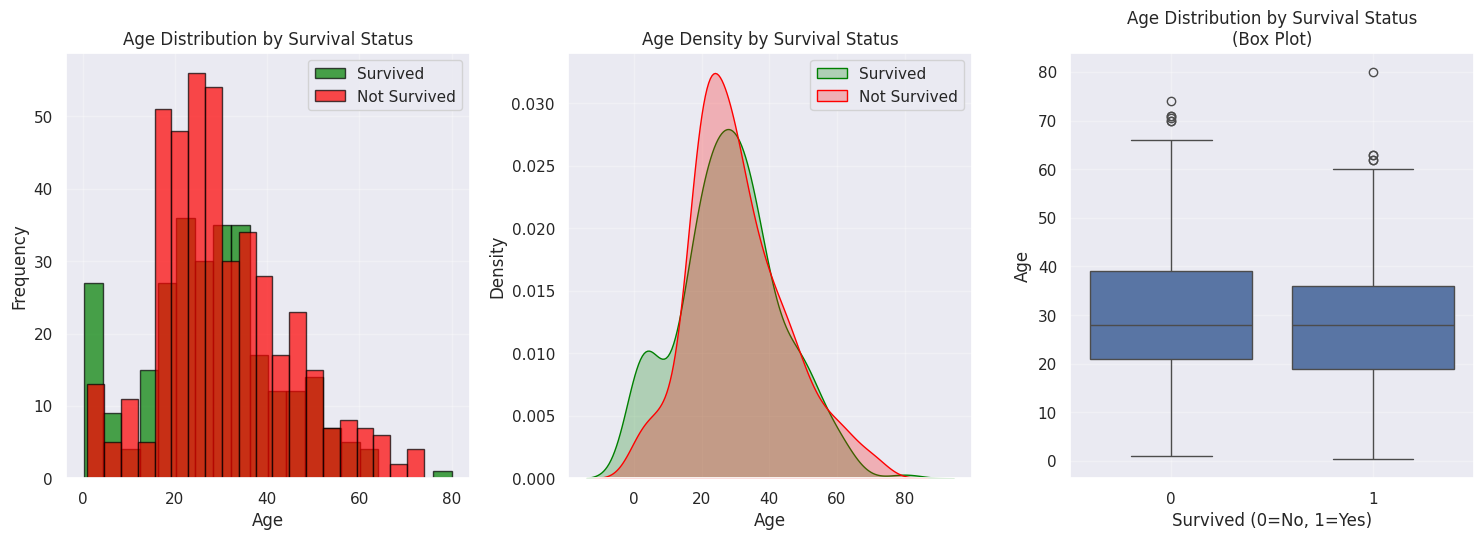

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
survived_ages = df[df['Survived'] == 1]['Age'].dropna()
not_survived_ages = df[df['Survived'] == 0]['Age'].dropna()

plt.hist(survived_ages, bins=20, alpha=0.7, label='Survived', color='green', edgecolor='black')
plt.hist(not_survived_ages, bins=20, alpha=0.7, label='Not Survived', color='red', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(2, 3, 2)
sns.kdeplot(survived_ages, fill=True, label='Survived', color='green')
sns.kdeplot(not_survived_ages, fill=True, label='Not Survived', color='red')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Density by Survival Status')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(2, 3, 3)
sns.boxplot(x='Survived', y='Age', data=df)
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.title('Age Distribution by Survival Status\n(Box Plot)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
mean_age_by_class = df.groupby('Pclass')['Age'].mean()
print("\nMean age by passenger class:")
for pclass, mean_age in mean_age_by_class.items():
    print(f"Class {pclass}: {mean_age:.1f} years")


Mean age by passenger class:
Class 1: 38.2 years
Class 2: 29.9 years
Class 3: 25.1 years



Mean age by passenger class and survival status:
Class 1 - Died: 43.7 years
Class 1 - Survived: 35.4 years
Class 2 - Died: 33.5 years
Class 2 - Survived: 25.9 years
Class 3 - Died: 26.6 years
Class 3 - Survived: 20.6 years


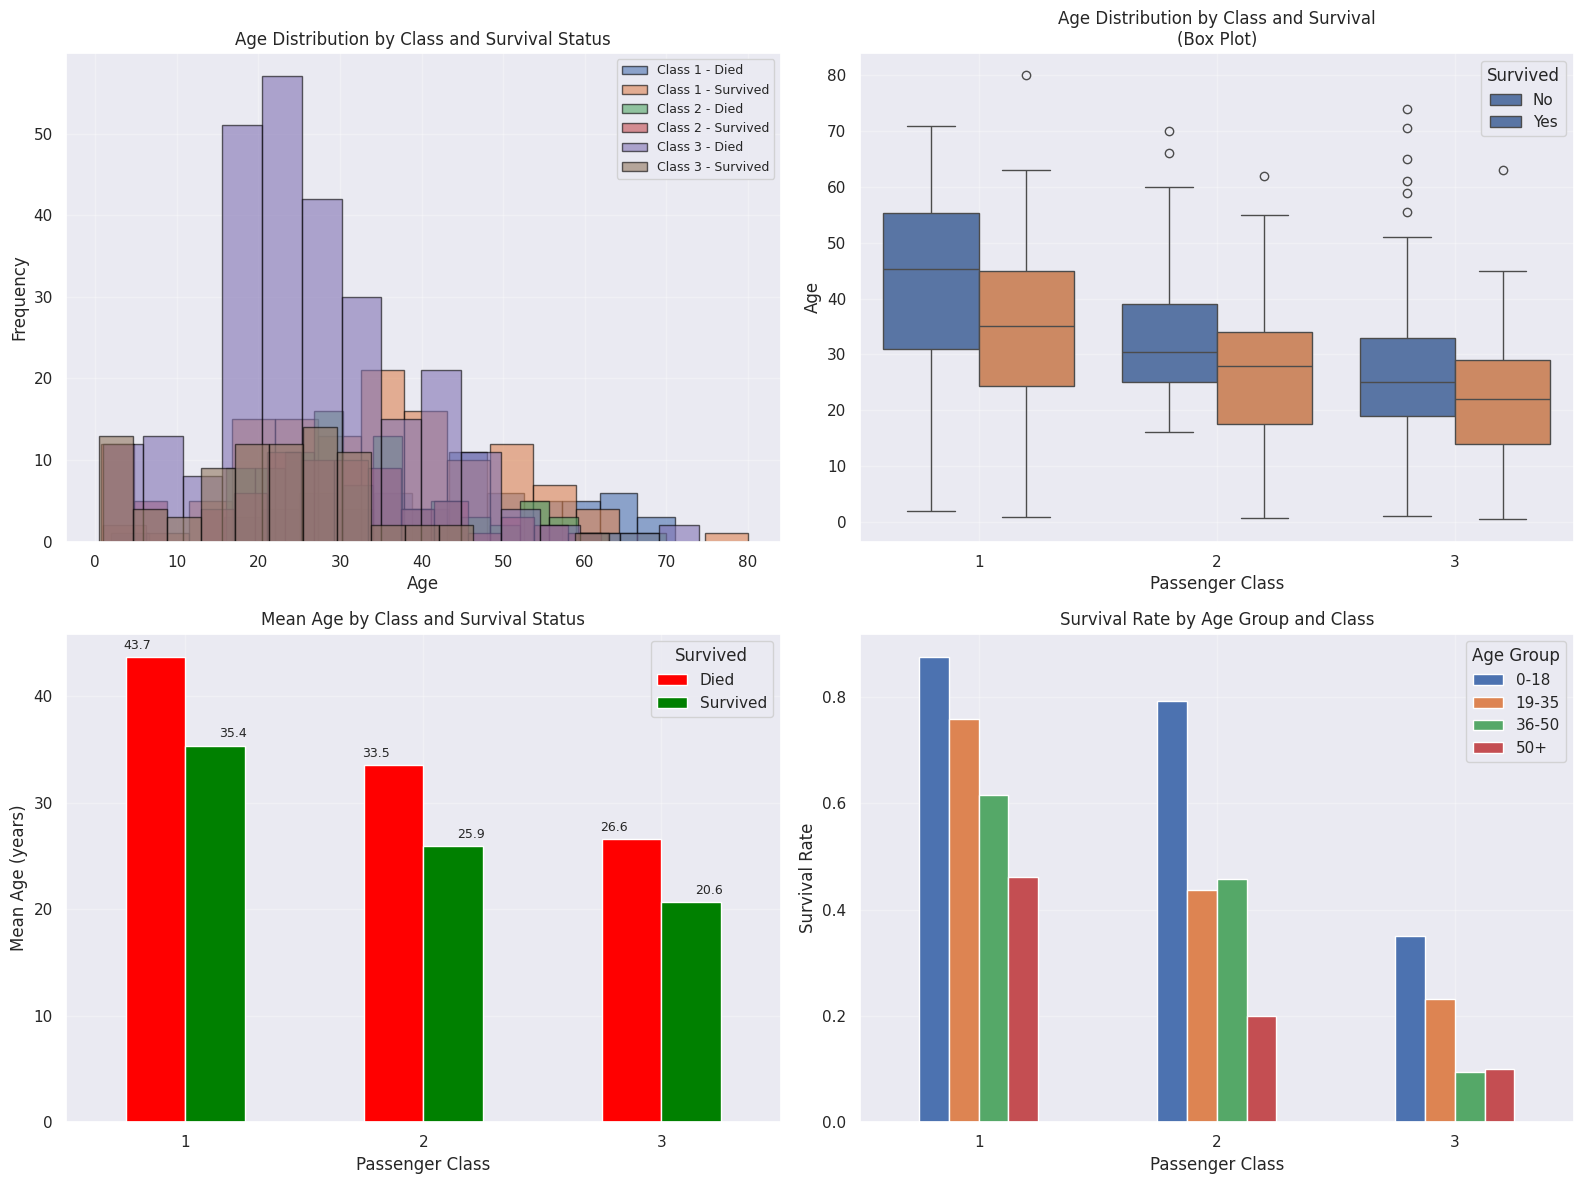

In [ ]:
# Calculate mean age by passenger class and survival status
mean_age_by_class_survival = df.groupby(['Pclass', 'Survived'])['Age'].mean()
print("\nMean age by passenger class and survival status:")
for (pclass, survived), mean_age in mean_age_by_class_survival.items():
    survival_status = "Survived" if survived == 1 else "Died"
    print(f"Class {pclass} - {survival_status}: {mean_age:.1f} years")

# Visualize age distribution by passenger class and survival status
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Age distribution by class and survival (histograms)
for pclass in sorted(df['Pclass'].unique()):
    for survived in [0, 1]:
        subset = df[(df['Pclass'] == pclass) & (df['Survived'] == survived)]['Age'].dropna()
        label = f'Class {pclass} - {"Survived" if survived == 1 else "Died"}'
        axes[0, 0].hist(subset, bins=15, alpha=0.6, label=label, edgecolor='black')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution by Class and Survival Status')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(alpha=0.3)

# Plot 2: Box plot by class and survival
df_filtered = df.dropna(subset=['Age'])
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df_filtered, ax=axes[0, 1])
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_ylabel('Age')
axes[0, 1].set_title('Age Distribution by Class and Survival\n(Box Plot)')
axes[0, 1].legend(title='Survived', labels=['No', 'Yes'])
axes[0, 1].grid(alpha=0.3)

# Plot 3: Mean age by class and survival (bar plot)
mean_age_data = df_filtered.groupby(['Pclass', 'Survived'])['Age'].mean().unstack()
mean_age_data.plot(kind='bar', color=['red', 'green'], ax=axes[1, 0])
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Mean Age (years)')
axes[1, 0].set_title('Mean Age by Class and Survival Status')
axes[1, 0].set_xticklabels(mean_age_data.index, rotation=0)
axes[1, 0].legend(title='Survived', labels=['Died', 'Survived'])
for i, pclass in enumerate(mean_age_data.index):
    for j, survived in enumerate([0, 1]):
        value = mean_age_data.iloc[i, j]
        axes[1, 0].text(i + (-0.2 if survived == 0 else 0.2), value + 0.5, f'{value:.1f}',
                       ha='center', va='bottom', fontsize=9)
axes[1, 0].grid(alpha=0.3)

# Plot 4: Survival rate by age groups and class
df_filtered['AgeGroup'] = pd.cut(df_filtered['Age'], bins=[0, 18, 35, 50, 100],
                                labels=['0-18', '19-35', '36-50', '50+'])
survival_by_age_class = df_filtered.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()
survival_by_age_class.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Passenger Class')
axes[1, 1].set_ylabel('Survival Rate')
axes[1, 1].set_title('Survival Rate by Age Group and Class')
axes[1, 1].set_xticklabels(survival_by_age_class.index, rotation=0)
axes[1, 1].legend(title='Age Group')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\nPassenger count by class and survival:")
count_summary = df_filtered.groupby(['Pclass', 'Survived'])['Age'].count()
count_summary


Passenger count by class and survival:


Pclass  Survived
1       0            64
        1           122
2       0            90
        1            83
3       0           270
        1            85
Name: Age, dtype: int64

In [ ]:
mean_age_by_gender = df.groupby('Sex')['Age'].mean()
print("\nMean age by gender:")
print(f"Male: {mean_age_by_gender['male']:.1f} years")
print(f"Female: {mean_age_by_gender['female']:.1f} years")
print(f"Difference: {abs(mean_age_by_gender['male'] - mean_age_by_gender['female']):.1f} years")


Mean age by gender:
Male: 30.7 years
Female: 27.9 years
Difference: 2.8 years


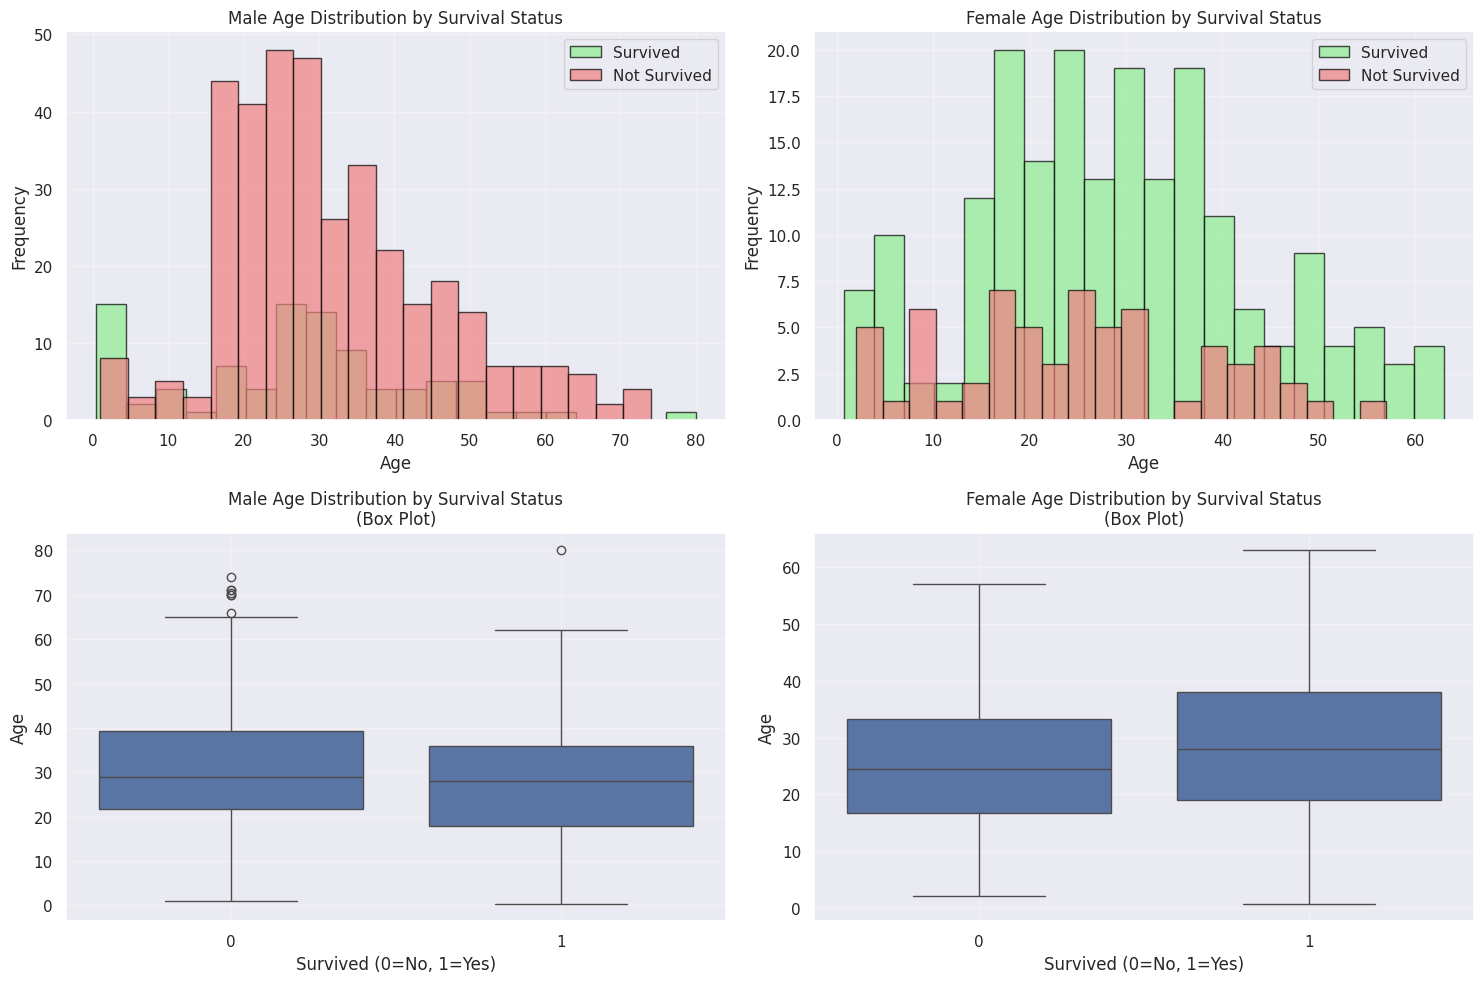

In [ ]:
# Visualize age distribution for males and females separately by survival status
plt.figure(figsize=(15, 10))

# Plot 1: Male age distribution by survival
plt.subplot(2, 2, 1)
male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]['Age'].dropna()
male_not_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]['Age'].dropna()

plt.hist(male_survived, bins=20, alpha=0.7, label='Survived', color='lightgreen', edgecolor='black')
plt.hist(male_not_survived, bins=20, alpha=0.7, label='Not Survived', color='lightcoral', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Male Age Distribution by Survival Status')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Female age distribution by survival
plt.subplot(2, 2, 2)
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Age'].dropna()
female_not_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]['Age'].dropna()

plt.hist(female_survived, bins=20, alpha=0.7, label='Survived', color='lightgreen', edgecolor='black')
plt.hist(female_not_survived, bins=20, alpha=0.7, label='Not Survived', color='lightcoral', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Female Age Distribution by Survival Status')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Box plot for males by survival
plt.subplot(2, 2, 3)
male_data = df[df['Sex'] == 'male']
sns.boxplot(x='Survived', y='Age', data=male_data)
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.title('Male Age Distribution by Survival Status\n(Box Plot)')
plt.grid(alpha=0.3)

# Plot 4: Box plot for females by survival
plt.subplot(2, 2, 4)
female_data = df[df['Sex'] == 'female']
sns.boxplot(x='Survived', y='Age', data=female_data)
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.title('Female Age Distribution by Survival Status\n(Box Plot)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Исходя из полученных графиков, можно сделать вывод, что на выживаемость при крушении титаника повлияли: возраст, пол и класс пассажира. Пол является очень важным фактором, на гистограмме и бокплотах видно, что женщин выжило гораздо больше и в абсолютном количестве, и в относительном внутри своего пола, хотя помним, что мужчин на корабле было больше. Дальше, конечно, повлиял класс, на графике распределения видно, что пассажиры первого класса имели приоритетный доступ к спасательнвм шлюпкам, тогда как выживаемость в третьем классе была минимальной. И так же возраст имел значение, но все же его влияние ослабевало в низших классах (4 график первой части). Видно, что дети из первого и второго классов спасались чаще.

Итог: наибольший шанс выжить был у женщин и детей первого класса, наименьший приоритет - у мужчин из третьего класса.

# 4. Linear Regression and Gradient Descent

### Data

For this homework we will use a dataset of taxi fares based on distance, traffic, and weather.

**Data description**

- **Distance** (in kilometers): The length of the trip.
- **Pickup Time**: The starting time of the trip.
- **Dropoff Time**: The ending time of the trip.
- **Traffic Condition**: Categorical indicator of traffic (light, medium, heavy).
- **Passenger Count**: Number of passengers for the trip.
- **Weather Condition**: Categorical data for weather (clear, rain, snow).
- **Trip Duration** (in minutes): Total trip time.

**Target variable**
- **Fare Amount**: The cost of the trip (in USD).

In [188]:
data = pd.read_csv('taxi_trip_pricing.csv')

y = data['Trip_Price']
X = data.drop(['Trip_Price'], axis=1)
columns = X.columns

In [121]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [122]:
data.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Morning,Weekend,1.0,Medium,Clear,3.43,0.91,0.50,67.43,60.0770
96,26.61,Morning,Weekday,4.0,Low,Rain,3.07,0.68,0.18,65.91,33.0286
97,21.95,Morning,Weekday,3.0,Medium,Clear,4.05,0.88,0.10,44.99,27.8650
98,2.25,Evening,Weekend,3.0,Low,Clear,3.99,1.88,0.50,NaN,40.6500


## Linear Regression (2 points)

#### 0. [0.1 points] Code the categorical features. Explain the method you have chosen.

In [158]:
# Time_of_Day: Ordinal Encoding (естественный временной порядок)
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_mapping = {time: i for i, time in enumerate(time_order)}
data['Time_of_Day_Encoded'] = data['Time_of_Day'].map(time_mapping)

# Traffic_Conditions: Ordinal Encoding (естественный порядок интенсивности)
traffic_order = ['Low', 'Medium', 'High']
traffic_mapping = {traffic: i for i, traffic in enumerate(traffic_order)}
data['Traffic_Conditions_Encoded'] = data['Traffic_Conditions'].map(traffic_mapping)

# Weather: One-Hot Encoding (номинальная категория без естественного порядка)
#weather_encoded = pd.get_dummies(data['Weather'], prefix='Weather')
#data = pd.concat([data, weather_encoded], axis=1)

weather_order = ['Clear', 'Rain', 'Snow']  # ясная -> дождь -> снег (ухудшение условий)
weather_mapping = {weather: i for i, weather in enumerate(weather_order)}
data['Weather_Encoded'] = data['Weather'].map(weather_mapping)

# Day_of_Week: Binary Encoding (бинарная категория)
data['Is_Weekend'] = (data['Day_of_Week'] == 'Weekend').astype(int)

data = data.drop(['Time_of_Day', 'Traffic_Conditions', 'Weather', 'Day_of_Week'], axis=1)
data.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Encoded,Traffic_Conditions_Encoded,Weather_Encoded,Is_Weekend
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624,0.0,0.0,0.0,0
1,47.59,1.0,NaN,0.62,0.43,40.57,NaN,1.0,2.0,0.0,0
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032,2.0,2.0,0.0,1
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698,2.0,0.0,NaN,0
4,NaN,3.0,2.93,0.63,0.32,22.64,15.6180,2.0,2.0,0.0,0


#### 0. [0.1 points] Fill in missing values and explain why you have chosen the used method.

In [159]:
print("Пропущенные значения в датасете:")
print(data.isnull().sum())

Пропущенные значения в датасете:
Trip_Distance_km              50
Passenger_Count               50
Base_Fare                     50
Per_Km_Rate                   50
Per_Minute_Rate               50
Trip_Duration_Minutes         50
Trip_Price                    49
Time_of_Day_Encoded           50
Traffic_Conditions_Encoded    50
Weather_Encoded               50
Is_Weekend                     0
dtype: int64


In [160]:
# для числовых признаков используем медиану
numeric_cols = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
                'Per_Minute_Rate', 'Trip_Duration_Minutes']
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# для категориальных признаков используем моду
categorical_cols = ['Time_of_Day_Encoded', 'Traffic_Conditions_Encoded', 'Weather_Encoded']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Trip_Price заполняем по формуле расчета
data['Trip_Price'].fillna(
    data['Base_Fare'] +
    data['Trip_Distance_km'] * data['Per_Km_Rate'] +
    data['Trip_Duration_Minutes'] * data['Per_Minute_Rate'],
    inplace=True
)

print("Пропущенные значения после обработки:")
print(data.isnull().sum())

Пропущенные значения после обработки:
Trip_Distance_km              0
Passenger_Count               0
Base_Fare                     0
Per_Km_Rate                   0
Per_Minute_Rate               0
Trip_Duration_Minutes         0
Trip_Price                    0
Time_of_Day_Encoded           0
Traffic_Conditions_Encoded    0
Weather_Encoded               0
Is_Weekend                    0
dtype: int64


#### 1. [0 points] Split the data into train and test with a ratio of 80:20 and random_state=42.

In [161]:
X = data.drop('Trip_Price', axis=1)
y = data['Trip_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")

Размер обучающей выборки: (800, 10)
Размер тестовой выборки: (200, 10)
Размер y_train: (800,)
Размер y_test: (200,)


#### 2. [0.4 points] Train models on train, excluding categorical features, using the StatsModels library and apply it to test; use $RMSE$ and $R^2$ as quality metrics. Try also applying linear regression implementations from sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$

Don't forget to scale your data using StandardScaler before training your models!

In [162]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# StatsModels
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()
y_pred_sm = model_sm.predict(X_test_sm)

# Scikit-learn модели
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=0.03),
    'Lasso': Lasso(alpha=0.05)
}

results = {}
results['StatsModels'] = {'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_sm)),
                         'R2': r2_score(y_test, y_pred_sm)}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

for model, metrics in results.items():
    print(f"{model:15} | RMSE: {metrics['RMSE']:.4f} | R2: {metrics['R2']:.4f}")

StatsModels     | RMSE: 13.1116 | R2: 0.7972
LinearRegression | RMSE: 13.1116 | R2: 0.7972
Ridge           | RMSE: 13.1111 | R2: 0.7972
Lasso           | RMSE: 13.0976 | R2: 0.7976


Хороший результат, все модели обьясняют около 80% диспресий цены, лучше всего по качеству - Lasso c alpha-0.05

#### 3. [0.1 points] Repeat the steps from the previous point, adding categorical features. Comment on the changes in the quality metrics values

In [164]:
cat_cols_to_drop = ['Time_of_Day_Encoded', 'Traffic_Conditions_Encoded',
                   'Weather_Encoded', 'Is_Weekend'] # в этом варинате убираем категориальные

X_train_numeric_only = X_train.drop(cat_cols_to_drop, axis=1)
X_test_numeric_only = X_test.drop(cat_cols_to_drop, axis=1)

scaler_num = StandardScaler()
X_train_scaled_num = scaler_num.fit_transform(X_train_numeric_only)
X_test_scaled_num = scaler_num.transform(X_test_numeric_only)

X_train_sm_num = sm.add_constant(X_train_scaled_num)
X_test_sm_num = sm.add_constant(X_test_scaled_num)
model_sm_num = sm.OLS(y_train, X_train_sm_num).fit()
y_pred_sm_num = model_sm_num.predict(X_test_sm_num)

results_num_only = {}
results_num_only['StatsModels'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_sm_num)),
    'R2': r2_score(y_test, y_pred_sm_num)
}

for name, model in models.items():
    model.fit(X_train_scaled_num, y_train)
    y_pred = model.predict(X_test_scaled_num)
    results_num_only[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

print("включая закодированные категориальные:")
for model, metrics in results.items():
    print(f"{model:15} | RMSE: {metrics['RMSE']:.4f} | R2: {metrics['R2']:.4f}")

print("\nТолько числовые признаки без категориальных:")
for model, metrics in results_num_only.items():
    print(f"{model:15} | RMSE: {metrics['RMSE']:.4f} | R2: {metrics['R2']:.4f}")

включая закодированные категориальные:
StatsModels     | RMSE: 13.1116 | R2: 0.7972
LinearRegression | RMSE: 13.1116 | R2: 0.7972
Ridge           | RMSE: 13.1111 | R2: 0.7972
Lasso           | RMSE: 13.0976 | R2: 0.7976

Только числовые признаки без категориальных:
StatsModels     | RMSE: 13.1196 | R2: 0.7970
LinearRegression | RMSE: 13.1196 | R2: 0.7970
Ridge           | RMSE: 13.1191 | R2: 0.7970
Lasso           | RMSE: 13.1041 | R2: 0.7974


Неожиданно, но без категориальных признаков результат чуть лучше, значит они вносят шум и избыточность и не помогают предсказывать цену или неправильно закодированы.

Upd: Поменяла способ кодировки для погоды, все-таки там есть упорядочевание, теперь результат модели с категориальными признаками лучше, чем без.

#### 4. [0.5 point] Examine the parameter values ​​of the models obtained from StatsModels and check which weights and in which models turned out to be zero. Comment on the significance of the coefficients, the overall significance of the models and other factors from the resulting tables

In [174]:
feature_names = ['const'] + list(X_train.columns)
for i, name in enumerate(feature_names):
    print(f"x{i} = {name}")

print("Знчимые признаки:")
significant = model_sm.pvalues[model_sm.pvalues < 0.05]
for feature, pval in significant.items():
    coef = model_sm.params[feature]
    if feature == 'const':
        feature_name = 'const'
    else:
        feature_idx = int(feature[1:])  #
        feature_name = feature_names[feature_idx]
    print(f"{feature_name:25} | coeff: {coef:7.3f} | p-value: {pval:.4f}")

lasso_model = models['Lasso']

lasso_coef_df = pd.DataFrame({
    'feature': list(X_train.columns)[:len(lasso_model.coef_)],
    'coef': lasso_model.coef_
})
zero_coef_lasso = lasso_coef_df[lasso_coef_df['coef'] == 0]
print(f"\nНулевые коэффициенты Lasso ({len(zero_coef_lasso)}):")
print(zero_coef_lasso)


x0 = const
x1 = Trip_Distance_km
x2 = Passenger_Count
x3 = Base_Fare
x4 = Per_Km_Rate
x5 = Per_Minute_Rate
x6 = Trip_Duration_Minutes
x7 = Time_of_Day_Encoded
x8 = Traffic_Conditions_Encoded
x9 = Weather_Encoded
x10 = Is_Weekend
знчимые признаки:
const                     | coeff:  57.345 | p-value: 0.0000
Trip_Distance_km          | coeff:  36.602 | p-value: 0.0000
Per_Km_Rate               | coeff:  10.773 | p-value: 0.0000
Per_Minute_Rate           | coeff:   6.187 | p-value: 0.0000
Trip_Duration_Minutes     | coeff:   9.384 | p-value: 0.0000

Нулевые коэффициенты Lasso (0):
Empty DataFrame
Columns: [feature, coef]
Index: []


Пояснение к значимости признаков:

Trip_Distance_km - расстояние сильно влияет на цену (+36.6)
Per_Km_Rate - тариф за км значим (+10.8)
Trip_Duration_Minutes - время поездки важно (+9.4)
Per_Minute_Rate - тариф за минуту тоже влияет (+6.2)

Остальные признаки статестически не значимы, следовательно цена поездки определяется в основном расстоянием, временем и тарифными ставками, а не количеством пассажиров или контекстными факторами.

#### 5. [0.5 point] Implement one of the feature selection algorithms (Elimination by P-value, Forward elimination, Backward elimination), draw conclusions.

In [182]:
# Backward Elimination по P-value
def backward_elimination(X, y, threshold=0.05):
    """
    Backward elimination по p-value
    Удаляем признаки с p-value > threshold по одному
    """
    X_temp = X.copy()
    features = list(X_temp.columns)

    while True:
        X_with_const = sm.add_constant(X_temp)
        model = sm.OLS(y, X_with_const).fit()

        pvalues = model.pvalues[1:]  # исключаем const
        max_pvalue = pvalues.max()
        max_pfeature = pvalues.idxmax()

        if max_pvalue > threshold:
            print(f"Удаляем {max_pfeature} (p-value: {max_pvalue:.4f})")
            X_temp = X_temp.drop(max_pfeature, axis=1)
            features.remove(max_pfeature)
        else:
            break

    return X_temp, features, model

X_selected, selected_features, final_model = backward_elimination(X_train, y_train)

print(f"\nОтобрано признаков: {len(selected_features)}")
print("Отобранные признаки:")
for feature in selected_features:
    print(f"  - {feature}")


X_test_selected = X_test[selected_features]
X_test_sm_selected = sm.add_constant(X_test_selected)
y_pred_selected = final_model.predict(X_test_sm_selected)

rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_selected))
r2_selected = r2_score(y_test, y_pred_selected)

print(f"\nКачество модели после отбора признаков:")
print(f"RMSE: {rmse_selected:.4f}")
print(f"R²: {r2_selected:.4f}")

# Сравнение с полной моделью
print(f"Полная модель:    RMSE: {results['StatsModels']['RMSE']:.4f}, R²: {results['StatsModels']['R2']:.4f}")
print(f"После отбора:     RMSE: {rmse_selected:.4f}, R²: {r2_selected:.4f}")

Удаляем Passenger_Count (p-value: 0.8378)
Удаляем Is_Weekend (p-value: 0.8117)
Удаляем Traffic_Conditions_Encoded (p-value: 0.7260)
Удаляем Weather_Encoded (p-value: 0.6984)
Удаляем Base_Fare (p-value: 0.5010)
Удаляем Time_of_Day_Encoded (p-value: 0.1358)

Отобрано признаков: 4
Отобранные признаки:
  - Trip_Distance_km
  - Per_Km_Rate
  - Per_Minute_Rate
  - Trip_Duration_Minutes

Качество модели после отбора признаков:
RMSE: 13.1183
R²: 0.7970
Полная модель:    RMSE: 13.1116, R²: 0.7972
После отбора:     RMSE: 13.1183, R²: 0.7970


То есть остальные признаки можем удалить безпотери качества, но при этом снизим риск переобучения.

#### 6. [0.3 point] Find the best (RMSE) $\alpha$ for Lasso regression using 4-fold cross-validation. You should choose a value from the logarithmic range $[10^{-4}, 10^{3}]$.

Лучшее alpha: 0.403702
Количество ненулевых коэффициентов: 5
Лучший R² на CV: 0.8698

Качество на тестовой выборке:
RMSE: 13.0172
R²: 0.8001
Сравнение с (alpha=0.05):
Alpha=0.05:  RMSE: 13.0976, R²: 0.7976
Alpha=0.403702: RMSE: 13.0172, R²: 0.8001


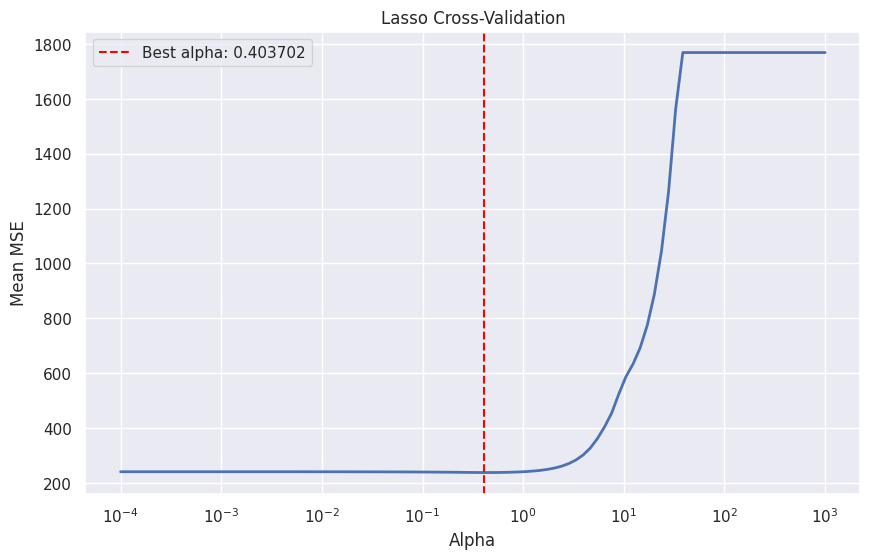

In [184]:
alphas = np.logspace(-4, 3, 100)
kf = KFold(n_splits=4, shuffle=True, random_state=42)
lasso_cv = LassoCV(alphas=alphas, cv=kf, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Лучшее alpha: {lasso_cv.alpha_:.6f}")
print(f"Количество ненулевых коэффициентов: {np.sum(lasso_cv.coef_ != 0)}")
print(f"Лучший R² на CV: {lasso_cv.score(X_train_scaled, y_train):.4f}")
y_pred_best_lasso = lasso_cv.predict(X_test_scaled)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_lasso))
r2_best = r2_score(y_test, y_pred_best_lasso)

print(f"\nКачество на тестовой выборке:")
print(f"RMSE: {rmse_best:.4f}")
print(f"R²: {r2_best:.4f}")
print(f"Сравнение с (alpha=0.05):")
print(f"Alpha=0.05:  RMSE: {results['Lasso']['RMSE']:.4f}, R²: {results['Lasso']['R2']:.4f}")
print(f"Alpha={lasso_cv.alpha_:.6f}: RMSE: {rmse_best:.4f}, R²: {r2_best:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), 'b-', linewidth=2)
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', label=f'Best alpha: {lasso_cv.alpha_:.6f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean MSE')
plt.title('Lasso Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()

## Gradient Descent (3 point)

#### 7. [1.5 points] Implement Ridge regression for MSE loss trained using gradient descent.

All computations must be vectorized, and Python loops can only be used for gradient descent iterations. The stopping criteria must be (simultaneously):

* checking the absolute norm of the difference in weights on two adjacent iterations (e.g., less than some small number of the order of $10^{-6}$, specified by the `tolerance` parameter);

* reaching the maximum number of iterations (e.g., 10000, specified by the `max_iter` parameter).

You need to do:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is an estimate of the gradient over a set of objects chosen at random.

To verify that the optimization process is actually running, we will use the `loss_history` class attribute. After calling the fit method, it should contain the loss function values ​​for all iterations starting from the first (up to the first step along the antigradient).

You need to initialize the weights with a random vector from a normal distribution. Below is a template that should contain code implementing all the model variants.

In [189]:
class LinReg(BaseEstimator):
    gradient_descent = "GradientDescent"
    stochastic_descent = "StochasticDescent"
    momentum = "Momentum"
    adagrad = "Adagrad"

    def __init__(self, delta=1.0, gd_type='StochasticDescent',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, reg_coef=0.0, epsilon=1e-8):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_coef: float
            regularization coefficient
        epsilon: float
            numerical stability
        """

        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.reg_coef = reg_coef
        self.epsilon = epsilon
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        if self.w0 is None:
            self.w0 = np.random.normal(size=X.shape[1])

        self.w = self.w0.copy()
        self.loss_history = []

        last_w = self.w0.copy()
        current_iter = 0

        match self.gd_type:
            case LinReg.gradient_descent:
                self._gradient_descent(X, y, current_iter, last_w)
            case LinReg.stochastic_descent:
                self._stochastic_descent(X, y, current_iter, last_w)
            case LinReg.momentum:
                self._momentum(X, y, current_iter, last_w)
            case LinReg.adagrad:
                self._adagrad(X, y, current_iter, last_w)
            case _:
                raise Exception(f'Wrong gd_type: {self.gd_type}')

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        return X.dot(self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return 2 * (np.dot(-X.T, (y.flatten() - X.dot(self.w))) + self.w * self.reg_coef) / y.shape[0]

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        return np.dot((X.dot(self.w) - y.flatten()).T, (X.dot(self.w) - y.flatten())) / y.shape[0]

    def _stop_condition(self, current_iter, last_w):
        norm = np.linalg.norm(self.w - last_w)
        return (current_iter < self.max_iter and norm > self.tolerance) or current_iter == 0

    def _gradient_descent(self, X, y, current_iter, last_w):
        while self._stop_condition(current_iter, last_w):
            current_iter += 1
            last_w = self.w.copy()
            gradient = self.calc_gradient(X, y)
            self.w -= self.eta * gradient
            self.loss_history.append(self.calc_loss(X, y))

    def _stochastic_descent(self, X, y, current_iter, last_w):
        while self._stop_condition(current_iter, last_w):
            current_iter += 1
            last_w = self.w.copy()
            batch = np.random.choice(y.shape[0], int(self.delta * y.shape[0]))
            gradient = self.calc_gradient(X[batch], y[batch])
            self.w -= self.eta * gradient
            self.loss_history.append(self.calc_loss(X, y))

    def _momentum(self, X, y, current_iter, last_w):
        h = 0
        while self._stop_condition(current_iter, last_w):
            current_iter += 1
            last_w = self.w.copy()
            gradient = self.calc_gradient(X, y)
            h = h * self.alpha + self.eta * gradient
            self.w -= h
            self.loss_history.append(self.calc_loss(X, y))

    def _adagrad(self, X, y, current_iter, last_w):
        G = 0
        while self._stop_condition(current_iter, last_w):
            current_iter += 1
            last_w = self.w.copy()
            gradient = self.calc_gradient(X, y)
            G += gradient**2
            self.w -= (gradient / np.sqrt(G + self.epsilon)) * self.eta
            self.loss_history.append(self.calc_loss(X, y))

#### 8. [0.5 point] Train and validate "manual" models on the same data, compare the quality with models from Sklearn and StatsModels. Investigate the influence of the `max_iter` and `alpha` parameters on the optimization process. Does it meet your expectations?

In [191]:
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# библиотечные модели
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train_scaled, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test_scaled)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

sgd_sklearn = SGDRegressor(max_iter=1000, random_state=42)
sgd_sklearn.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_sklearn.predict(X_test_scaled)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

# StatsModels
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()
y_pred_sm = model_sm.predict(X_test_sm)
mse_sm = mean_squared_error(y_test, y_pred_sm)
gd_model = LinReg(gd_type='GradientDescent', max_iter=1000, eta=0.1)
gd_model.fit(X_train_scaled, y_train)
y_pred_gd = gd_model.predict(X_test_scaled)
mse_gd = mean_squared_error(y_test, y_pred_gd)

sgd_model = LinReg(gd_type='StochasticDescent', max_iter=1000, eta=0.01, delta=0.1)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd_manual = sgd_model.predict(X_test_scaled)
mse_sgd_manual = mean_squared_error(y_test, y_pred_sgd_manual)

print(f"{'Sklearn LinearRegression':25} MSE: {mse_sklearn:.6f}")
print(f"{'Sklearn SGDRegressor':25} MSE: {mse_sgd:.6f}")
print(f"{'StatsModels OLS':25} MSE: {mse_sm:.6f}")
print(f"{'Manual GradientDescent':25} MSE: {mse_gd:.6f}")
print(f"{'Manual StochasticDescent':25} MSE: {mse_sgd_manual:.6f}")

Sklearn LinearRegression  MSE: 0.011091
Sklearn SGDRegressor      MSE: 0.011214
StatsModels OLS           MSE: 0.011091
Manual GradientDescent    MSE: 1.382862
Manual StochasticDescent  MSE: 1.395354


In [209]:
gradient_descent = LinReg(gd_type=LinReg.gradient_descent, max_iter=1000, eta=0.01).fit(X_train_scaled, y_train)
stochastic_descent = LinReg(gd_type=LinReg.stochastic_descent, max_iter=1000, eta=0.01, delta=0.1).fit(X_train_scaled, y_train)
momentum = LinReg(gd_type=LinReg.momentum, max_iter=1000, eta=0.01, alpha=0.1).fit(X_train_scaled, y_train)
adagrad = LinReg(gd_type=LinReg.adagrad, max_iter=1000, eta=0.1).fit(X_train_scaled, y_train)

In [192]:
max_iters = [200, 500, 1000, 20000]
eta = 0.001

for max_iter in max_iters:
    model = LinReg(gd_type='GradientDescent', max_iter=max_iter, eta=eta, tolerance=1e-6)
    model.fit(X_train_scaled, y_train)
    final_loss = model.loss_history[-1] if model.loss_history else float('inf')
    iterations = len(model.loss_history)
    initial_loss = model.loss_history[0] if model.loss_history else float('inf')
    improvement = initial_loss - final_loss

    print(f"max_iter={max_iter:5}:")
    print(f"Начальный loss: {initial_loss:.2f}")
    print(f"Конечный loss:  {final_loss:.2f}")
    print(f"Улучшение:      {improvement:.2f}")
    print()

max_iter=  200:
Начальный loss: 4249.75
Конечный loss:  1865.87
Улучшение:      2383.88

max_iter=  500:
Начальный loss: 4398.63
Конечный loss:  557.85
Улучшение:      3840.78

max_iter= 1000:
Начальный loss: 4394.98
Конечный loss:  72.92
Улучшение:      4322.06

max_iter=20000:
Начальный loss: 4153.79
Конечный loss:  1.38
Улучшение:      4152.41



In [193]:
max_iters = [200, 500, 1000, 20000]
eta = 0.001

for max_iter in max_iters:
    model = LinReg(gd_type='StochasticDescent', max_iter=max_iter, eta=eta, tolerance=1e-6)
    model.fit(X_train_scaled, y_train)
    final_loss = model.loss_history[-1] if model.loss_history else float('inf')
    iterations = len(model.loss_history)
    initial_loss = model.loss_history[0] if model.loss_history else float('inf')
    improvement = initial_loss - final_loss

    print(f"max_iter={max_iter:5}:")
    print(f"Начальный loss: {initial_loss:.2f}")
    print(f"Конечный loss:  {final_loss:.2f}")
    print(f"Улучшение:      {improvement:.2f}")
    print()

max_iter=  200:
Начальный loss: 4215.83
Конечный loss:  1844.81
Улучшение:      2371.02

max_iter=  500:
Начальный loss: 4582.78
Конечный loss:  577.31
Улучшение:      4005.47

max_iter= 1000:
Начальный loss: 4221.96
Конечный loss:  69.49
Улучшение:      4152.48

max_iter=20000:
Начальный loss: 4558.53
Конечный loss:  1.38
Улучшение:      4557.15



Результаты оответствует ожиданиям: больше итераций -> лучше сходимость



In [206]:
# тут же нужно было проверить для Momentum ?
momentum_high_alpha = LinReg(gd_type=LinReg.momentum, delta=0.5, alpha=0.9, max_iter=1000).fit(X_train_scaled, y_train)
momentum_high_pred = momentum_high_alpha.predict(X_test_scaled)

momentum_medium_alpha = LinReg(gd_type=LinReg.momentum, delta=0.5, alpha=0.5, max_iter=1000).fit(X_train_scaled, y_train)
momentum_medium_pred = momentum_medium_alpha.predict(X_test_scaled)

momentum_low_alpha = LinReg(gd_type=LinReg.momentum, delta=0.5, alpha=0.1, max_iter=1000).fit(X_train_scaled, y_train)
momentum_low_pred = momentum_low_alpha.predict(X_test_scaled)

momentum_very_low_alpha = LinReg(gd_type=LinReg.momentum, delta=0.5, alpha=1e-3, max_iter=1000).fit(X_train_scaled, y_train)
momentum_very_low_pred = momentum_very_low_alpha.predict(X_test_scaled)

momentum_extreme_low_alpha = LinReg(gd_type=LinReg.momentum, delta=0.5, alpha=1e-12, max_iter=1000).fit(X_train_scaled, y_train)
momentum_extreme_low_pred = momentum_extreme_low_alpha.predict(X_test_scaled)

momentum_results_df = pd.DataFrame([
    (0.9, len(momentum_high_alpha.loss_history), np.sqrt(mean_squared_error(momentum_high_pred, y_test)), r2_score(y_test, momentum_high_pred)),
    (0.5, len(momentum_medium_alpha.loss_history), np.sqrt(mean_squared_error(momentum_medium_pred, y_test)), r2_score(y_test, momentum_medium_pred)),
    (0.1, len(momentum_low_alpha.loss_history), np.sqrt(mean_squared_error(momentum_low_pred, y_test)), r2_score(y_test, momentum_low_pred)),
    (1e-3, len(momentum_very_low_alpha.loss_history), np.sqrt(mean_squared_error(momentum_very_low_pred, y_test)), r2_score(y_test, momentum_very_low_pred)),
    (1e-12, len(momentum_extreme_low_alpha.loss_history), np.sqrt(mean_squared_error(momentum_extreme_low_pred, y_test)), r2_score(y_test, momentum_extreme_low_pred))
], columns=("Alpha", "Iterations", "RMSE", "R2"))

print(momentum_results_df.round(6)) # влияние есть, но незначительное

   Alpha  Iterations      RMSE        R2
0  0.900         215  1.176047  0.999625
1  0.500         240  1.175813  0.999626
2  0.100         424  1.175699  0.999626
3  0.001         470  1.175648  0.999626
4  0.000         468  1.175661  0.999626


#### 9. [0.5 point] Add support for the Momentum and AdaGrad methods to your LinReg class

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$


In [ ]:
# добавлены в коде предыдущего пункта
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

#### 10. [0.5 point] Plot graphs of the loss function values ​​as a function of the iteration number for all models (full gradient descent, stochastic gc, Momentum, and Adagrad). Draw conclusions about the convergence rate of various modifications of gradient descent.

Don't forget about what a *nice* graph should look like!

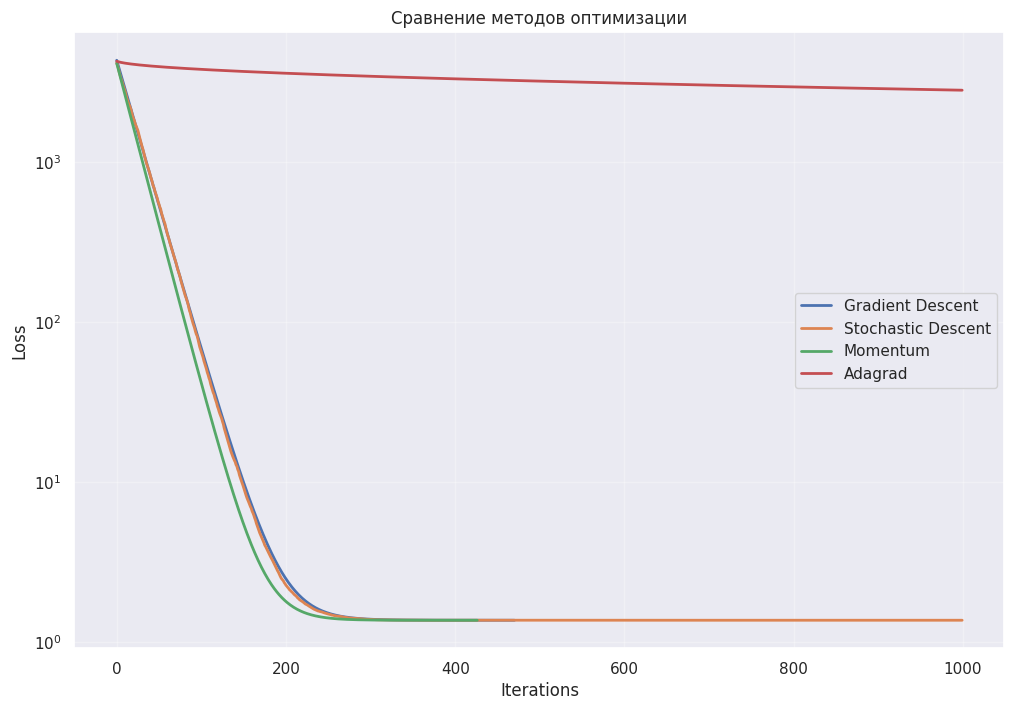

Gradient Descent     | RMSE: 1.1757 | R2: 0.9996 | Итерации: 471
Stochastic Descent   | RMSE: 1.1782 | R2: 0.9996 | Итерации: 1000
Momentum             | RMSE: 1.1757 | R2: 0.9996 | Итерации: 427
Adagrad              | RMSE: 49.1694 | R2: 0.3453 | Итерации: 1000


In [220]:
fig = plt.figure(figsize=(12, 8))

plt.plot(range(len(gradient_descent.loss_history)), gradient_descent.loss_history, label='Gradient Descent', linewidth=2)
plt.plot(range(len(stochastic_descent.loss_history)), stochastic_descent.loss_history, label='Stochastic Descent', linewidth=2)
plt.plot(range(len(momentum.loss_history)), momentum.loss_history, label='Momentum', linewidth=2)
plt.plot(range(len(adagrad.loss_history)), adagrad.loss_history, label='Adagrad', linewidth=2)

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Сравнение методов оптимизации")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

methods = {
    'Gradient Descent': gradient_descent,
    'Stochastic Descent': stochastic_descent,
    'Momentum': momentum,
    'Adagrad': adagrad
}

for name, model in methods.items():
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name:20} | RMSE: {rmse:.4f} | R2: {r2:.4f} | Итерации: {len(model.loss_history)}")

Momentum, Gradient Descent и Stochastic Descent достигли почти идеального предсказания (R^2= 0.9996). Momentum оказался самым быстрым - сошелся за 427 итераций. Adagrad показал низкое качество из-за слишком быстрого уменьшения learning rate.